Theme: Google Stock Price Analysis & Prediction

Section 1: Exploration of Google Stock 
    1.1 Overview
    1.2 Simple Average Move
    1.3 OHLC 
   
Section 2: Linear Regression Model & Stock Price Prediction
    2.1 Building the Model
    2.2 Fitting 
    2.3 Prediction

In [1]:
import pandas as pd
import numpy as np
import datetime
import pandas_datareader.data as web
import datetime as dt
import matplotlib.pyplot as plt

Machine Learning

In [2]:
from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LinearRegression

Visualization

In [3]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [27]:
# Get Google stock price from yahoo finance
start = dt.datetime(2000,1,1)
end = dt.datetime(2019, 3, 14)
df = web.DataReader ('GOOGL','yahoo', start, end)

print(df.head())
print(df.tail())

                 High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2004-08-19  52.082081  48.028027  50.050049  50.220219  44659000.0  50.220219
2004-08-20  54.594593  50.300301  50.555557  54.209209  22834300.0  54.209209
2004-08-23  56.796795  54.579578  55.430431  54.754753  18256100.0  54.754753
2004-08-24  55.855854  51.836838  55.675674  52.487488  15247300.0  52.487488
2004-08-25  54.054054  51.991993  52.532532  53.053055   9188600.0  53.053055
                   High          Low         Open        Close     Volume  \
Date                                                                        
2019-03-08  1153.449951  1130.199951  1133.900024  1149.969971  1184700.0   
2019-03-11  1179.910034  1151.569946  1152.000000  1179.260010  1501600.0   
2019-03-12  1205.709961  1182.300049  1182.300049  1197.250000  2111000.0   
2019-03-13  1207.119995  1197.910034  1205.930054  1199.060059  12944

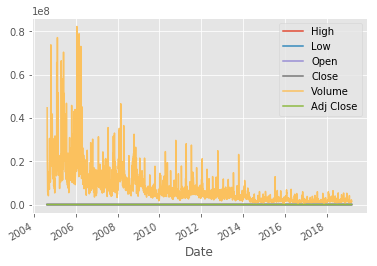

In [5]:
# A general picture of google stock price in the period
# we can tell that the trading volume is decreasing along with the increasing of price
df.plot() 

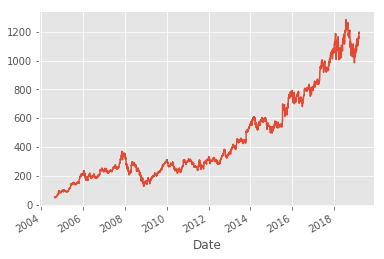

In [6]:
df['Adj Close'].plot()

                   High          Low         Open        Close     Volume  \
Date                                                                        
2019-03-08  1153.449951  1130.199951  1133.900024  1149.969971  1184700.0   
2019-03-11  1179.910034  1151.569946  1152.000000  1179.260010  1501600.0   
2019-03-12  1205.709961  1182.300049  1182.300049  1197.250000  2111000.0   
2019-03-13  1207.119995  1197.910034  1205.930054  1199.060059  1294400.0   
2019-03-14  1204.699951  1191.229980  1199.020020  1192.530029  1364400.0   

              Adj Close        40sma       100sma  
Date                                               
2019-03-08  1149.969971  1113.584750  1085.800898  
2019-03-11  1179.260010  1116.095502  1086.388098  
2019-03-12  1197.250000  1119.415002  1087.336199  
2019-03-13  1199.060059  1123.103754  1087.996000  
2019-03-14  1192.530029  1125.754254  1088.645400  


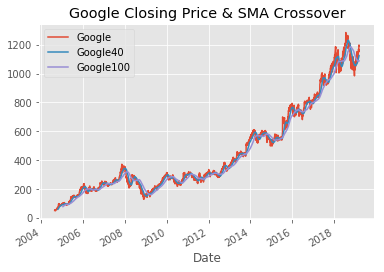

In [7]:
# Simple Moving average (SMA): smooths out price data by creating a constantly
# updated average price, which is regarded as an indictor for determining if
# an asset price will continue or reserve a bull or bear trend
# SMA = (P1 + P2 + .. + Pn)/n (n: the number of total periods) 

df['40sma'] = df['Adj Close'].rolling(40).mean() # define sma
df['100sma'] = df['Adj Close'].rolling(100).mean()

pd.DataFrame({'Google': df['Adj Close'],
             'Google40': df['40sma'],
             'Google100': df['100sma']
             }).plot(title = 'Google Closing Price & SMA Crossover');
df.dropna(inplace = True) # drop missing value 
print(df.tail())

In [8]:
# Resampling: a way to shunk the data size; 
# thus we can get more accurate price on hourly, daily, weekly, yearly price
# OHLC: Opening price, High point, Low point and Closing price

df_ohlc = df['Adj Close'].resample('7D').ohlc() # we choose 7 days for resampling
df_volume = df['Volume'].resample('7D').sum()

print(df_ohlc.tail())
print(df_volume.tail())

                   open         high          low        close
Date                                                          
2019-02-11  1102.119995  1129.199951  1102.119995  1119.630005
2019-02-18  1126.510010  1126.510010  1104.209961  1116.560059
2019-02-25  1117.329956  1148.520020  1117.329956  1148.520020
2019-03-04  1153.420044  1169.189941  1149.969971  1149.969971
2019-03-11  1179.260010  1199.060059  1179.260010  1192.530029
Date
2019-02-11    6525400.0
2019-02-18    5438900.0
2019-02-25    7241700.0
2019-03-04    7648300.0
2019-03-11    6271400.0
Name: Volume, dtype: float64


In [9]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates # dates formate

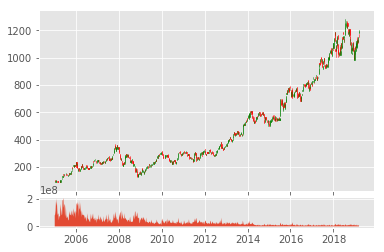

In [10]:
df_ohlc.reset_index(inplace = True)

df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

ax1 = plt.subplot2grid((6,1),(0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6,1),(5,0), rowspan = 1, colspan = 1, sharex = ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width = 2, colorup = 'g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
    # condense data with the same direction
plt.show()

Section 2: Linear Regression Model & Stock Price Prediction

2.1 Building the Model
    Step 1: Creating a new dataframe with selected variables
    Step 2: Defining new variables
    Step 3: HL_PCT = (High - Low)/Low
            Price Percentage change between High Point and Low point 
    Step 4: PCT_change = (Close - open)/open
            Price Percentage change between Opening Price and Closing 

In [11]:
df = df[['Open','High', 'Low', 'Adj Close', 'Volume']]
print(df.head())


                 Open        High        Low   Adj Close      Volume
Date                                                                
2005-01-10  97.347351   99.149147  96.011009   97.627625  15064100.0
2005-01-11  97.907906   98.953957  96.686684   96.866867  13903400.0
2005-01-12  97.262260   98.063065  95.345345   97.787788  16339200.0
2005-01-13  97.787788   98.793793  97.122124   97.762764  13685100.0
2005-01-14  98.098099  100.105103  97.162163  100.085083  19261300.0


In [12]:
df['HL_PCT'] = (df['High'] - df['Adj Close'])/df['Adj Close'] * 100.00
df['PCT_change'] = (df['Adj Close'] - df['Open'])/df['Open'] * 100.00

df = df[['Adj Close', 'HL_PCT', 'PCT_change', 'Volume']]
print(df.tail())

              Adj Close    HL_PCT  PCT_change     Volume
Date                                                    
2019-03-08  1149.969971  0.302615    1.417228  1184700.0
2019-03-11  1179.260010  0.055121    2.366320  1501600.0
2019-03-12  1197.250000  0.706616    1.264480  2111000.0
2019-03-13  1199.060059  0.672188   -0.569684  1294400.0
2019-03-14  1192.530029  1.020513   -0.541275  1364400.0


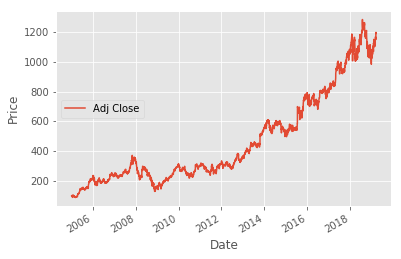

In [13]:
df['Adj Close'].plot()
plt.legend(loc=6)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

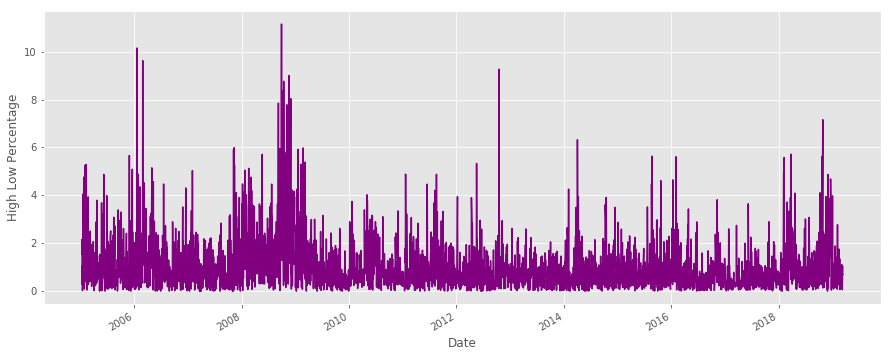

In [14]:
df['HL_PCT'].plot(figsize=(15,6), color="purple")
plt.xlabel('Date')
plt.ylabel('High Low Percentage')
plt.show()

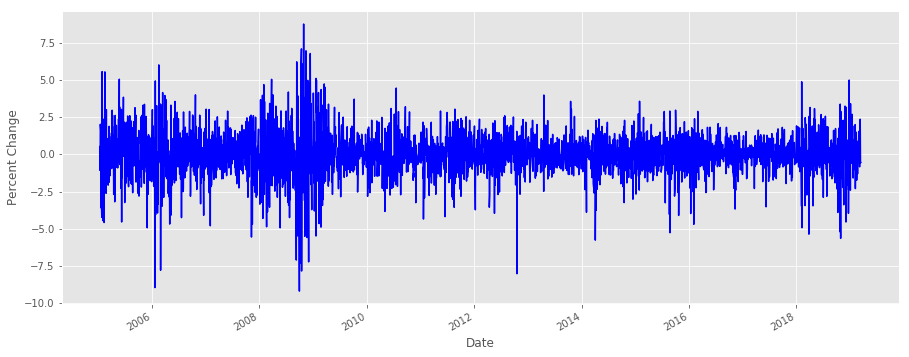

In [15]:
df['PCT_change'].plot(figsize=(15,6), color="blue")
plt.xlabel('Date')
plt.ylabel('Percent Change')
plt.show()

Section 2.2 Machine Learning - Linear Regression Model

In [16]:
# pick a forecast column
forecast_col = 'Adj Close'

# Chosing 30 days as number of forecast days
forecast_out = int(30)
print('length =',len(df), "and forecast_out =", forecast_out)

length = 3568 and forecast_out = 30


In [17]:
# Creating label by shifting 'Adj Close' according to 'forecast_out'
df['label'] = df[forecast_col].shift(-forecast_out)
print(df.head(2))
print('\n')
# If we look at the tail, it consists of n(=forecast_out) rows with NAN in Label column 
print(df.tail(

            Adj Close    HL_PCT  PCT_change      Volume      label
Date                                                              
2005-01-10  97.627625  1.558496    0.287911  15064100.0  97.072075
2005-01-11  96.866867  2.154596   -1.063283  13903400.0  94.539543


              Adj Close    HL_PCT  PCT_change     Volume  label
Date                                                           
2019-03-13  1199.060059  0.672188   -0.569684  1294400.0    NaN
2019-03-14  1192.530029  1.020513   -0.541275  1364400.0    NaN


In [18]:
# Define features Matrix X by excluding the label column which we just created 
X = np.array(df.drop(['label'], 1))

# we scale the data to avoid overweighted problem
X = preprocessing.scale(X)
print(X[1,:])

[-1.2155466   1.02303384 -0.70459021  0.87482613]


In [19]:
# X contains last 'n= forecast_out' rows for which we don't have label data
# Put those rows in different Matrix X_forecast_out by X_forecast_out = X[end-forecast_out:end]

X_forecast_out = X[-forecast_out:]
X = X[:-forecast_out]
print ("Length of X_forecast_out:", len(X_forecast_out), "& Length of X :", len(X))

Length of X_forecast_out: 30 & Length of X : 3538


In [20]:
# Similarly Define Label vector y for the data we have prediction for
# A good test is to make sure length of X and y are identical
y = np.array(df['label'])
y = y[:-forecast_out]
print('Length of y: ',len(y))

Length of y:  3538


Creating Training and Test Sets

In [21]:
# Cross validation (split into test and train data)
# test_size = 0.2 ==> 20% data is test data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

print('length of X_train and x_test: ', len(X_train), len(X_test))

length of X_train and x_test:  2830 708


In [22]:
# Train
clf = LinearRegression()
clf.fit(X_train,y_train)

# Test
accuracy = clf.score(X_test, y_test)
print("Accuracy of Linear Regression: ", accuracy)

Accuracy of Linear Regression:  0.9794629754151177


Prediction - Predict Price/share for the next 30 days

In [23]:
# Predict using our Model
forecast_prediction = clf.predict(X_forecast_out)
print(forecast_prediction)

[1136.5267987  1129.26830014 1150.61992752 1160.98506936 1133.13958678
 1117.40875284 1113.78899838 1113.41257088 1137.87153354 1139.58669024
 1140.45226785 1131.01084305 1137.72764591 1132.21298753 1115.57442154
 1127.98252598 1128.87980969 1132.91584494 1134.19029097 1137.39644303
 1159.10670118 1164.17262682 1179.39427736 1176.5105853  1162.17713127
 1160.74148529 1189.44786457 1207.21084811 1210.69515935 1203.77867052]


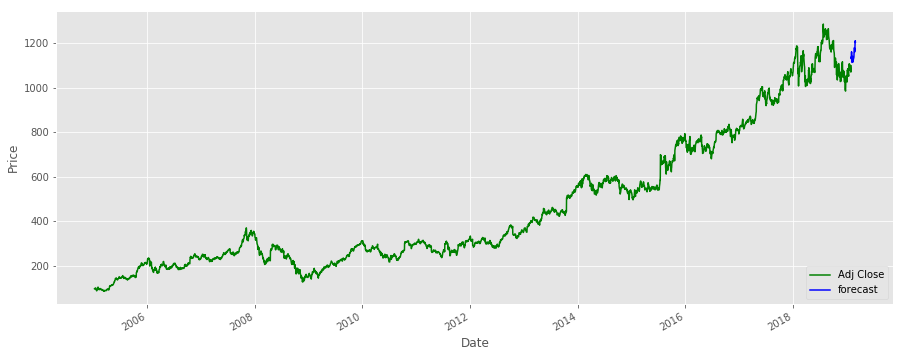

In [24]:
# Plotting data
df.dropna(inplace=True)
df['forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_prediction:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
df['Adj Close'].plot(figsize=(15,6), color="green")
df['forecast'].plot(figsize=(15,6), color="blue")
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


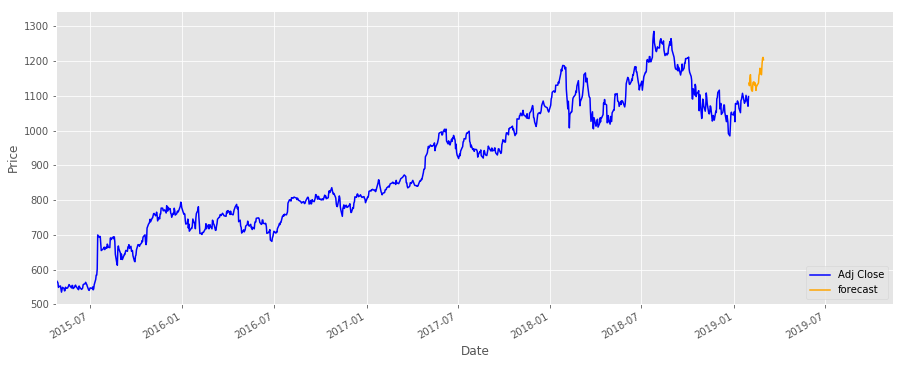

In [25]:
# Zoomed In to a year
df['Adj Close'].plot(figsize=(15,6), color="blue")
df['forecast'].plot(figsize=(15,6), color="orange")
plt.xlim(xmin=datetime.date(2015, 4, 26))
plt.ylim(ymin=500)
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
